In [21]:
import csv
import datetime
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
data_dir = "."
def get_files(file_re):
    files = []
    for filename in os.listdir(data_dir):
        print(filename)

def get_csv_data(filename):
    data = []
    with open(filename, 'r') as f:
        b = csv.reader(f)
        next(b)
        for row in b:
            data.append(row)
    return data

In [23]:
data = get_csv_data("complied_all_data.csv")


In [24]:
src = 'knu'
dest = 'del'

In [25]:
def filter_data(src_, dest_):
    new = []
    for row in data:
        if row[0] == src_ and row[1]==dest_:
            new.append(row)
    return new

In [26]:
filt_data = filter_data(src, dest)

In [42]:
diwali_data = []
non_diwali_data = []
diwali_start = "2024-10-27"
diwali_end = "2024-11-05"

for row in filt_data:
    if diwali_start<=row[3] and row[3]<=diwali_end:
        diwali_data.append(row)
    else:
        non_diwali_data.append(row)

# diwali_data


In [28]:
def calc_avg_on_travel_date(data):
    sum = [0]*7
    cnt = [0]*7
    delta = 90 
    for row in data:
        trav_date = datetime.datetime.strptime(row[3], "%Y-%m-%d")
        book_date = datetime.datetime.strptime(row[2], "%Y-%m-%d")
        diff = trav_date - book_date
        if (diff.days < delta):
            ind = trav_date.weekday()
            sum[ind] += int(row[4])
            cnt[ind] += 1
    
    avg = [0]*7
    for i in range(7):
        if (cnt[i]==0):
            print("No data for ", i)
            avg[i] = 0;
        else:
            avg[i] = sum[i]/cnt[i]

    return avg


In [29]:
def calc_avg_on_booking_date(data):
    sum = [0]*7
    cnt = [0]*7
    delta = 90 
    for row in data:
        trav_date = datetime.datetime.strptime(row[3], "%Y-%m-%d")
        book_date = datetime.datetime.strptime(row[2], "%Y-%m-%d")
        diff = trav_date - book_date
        if (diff.days < delta):
            ind = book_date.weekday()
            sum[ind] += int(row[4])
            cnt[ind] += 1
    
    avg = [0]*7
    for i in range(7):
        if (cnt[i]==0):
            print("No data for ", i)
            avg[i] = 0;
        else:
            avg[i] = sum[i]/cnt[i]

    return avg

In [32]:
def plot_daywise_data(data):
    if len(data) != 7:
        raise ValueError("Data list must contain exactly 7 values.")

    days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

    plt.figure(figsize=(10, 6))
    plt.bar(days, data, color='skyblue')
    plt.xlabel("Day of the Week")
    plt.ylabel("Average Price")
    plt.title("Daywise Average Price")
    plt.show()

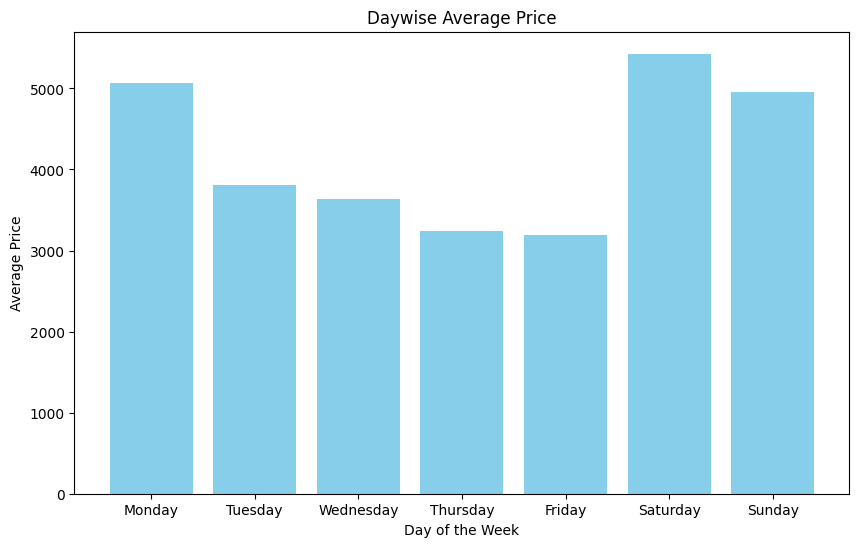

In [51]:
plot_daywise_data(calc_avg_on_travel_date(diwali_data))

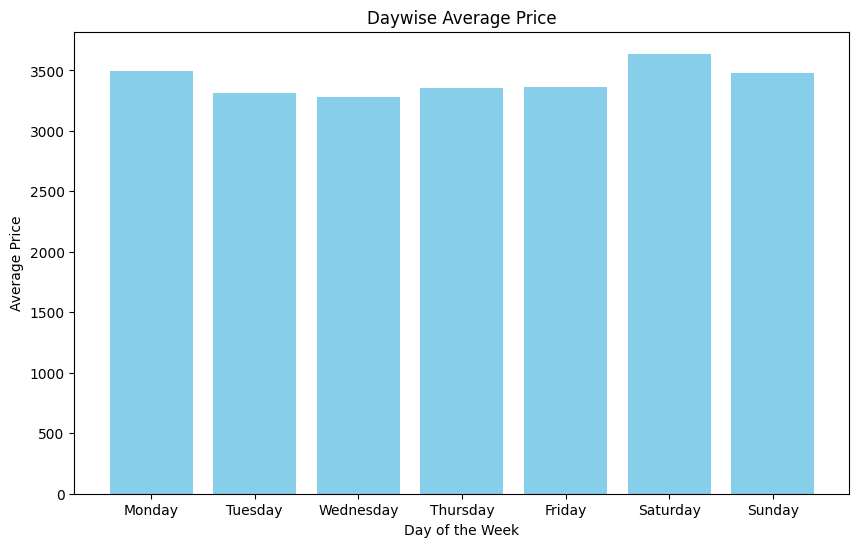

In [50]:
plot_daywise_data(calc_avg_on_travel_date(non_diwali_data))

In [54]:
def calc_avg_on_days_ago(data):
    sum = [0]*95
    cnt = [0]*95
    delta = 90
    tot_cnt = 0
    for row in data:
        trav_date = datetime.datetime.strptime(row[3], "%Y-%m-%d")
        book_date = datetime.datetime.strptime(row[2], "%Y-%m-%d")
        diff = trav_date - book_date
        if (diff.days < delta):
            ind = diff.days
            sum[ind] += int(row[4])
            cnt[ind] += 1
            tot_cnt += 1
    
    avg = [0]*95
    for i in range(95):
        if (cnt[i]==0):
            # print("No data for ", i)
            avg[i] = 0;
        else:
            avg[i] = sum[i]/cnt[i]

    print("Points Processed: ", tot_cnt)
    return avg

def plot_days_ago_data(data):
    # if len(data) != 12:
    #     raise ValueError("Data list must contain exactly 7 values.")

    # months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(data)), data, color='skyblue')
    plt.xlabel("Days Ago")
    plt.ylabel("Average Price")
    plt.title("Days ago Average Price")
    plt.show()




Points Processed:  592


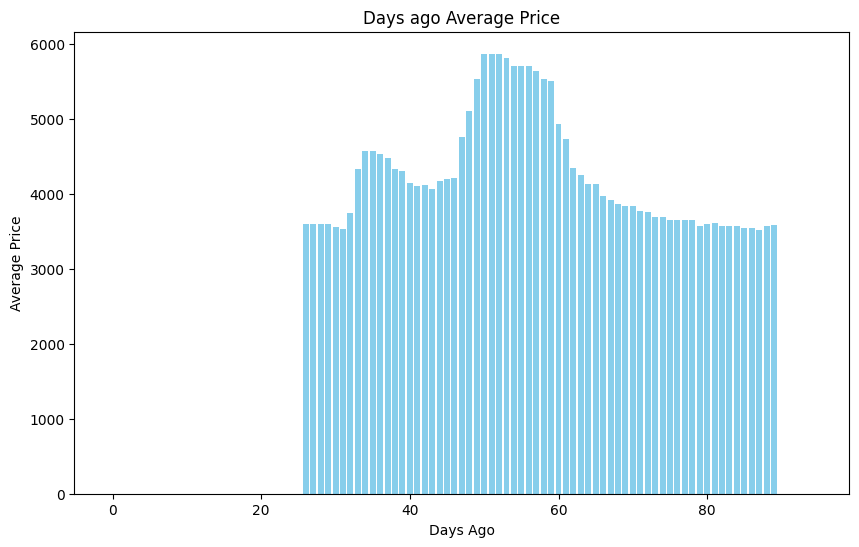

In [55]:
plot_days_ago_data(calc_avg_on_days_ago(diwali_data))

Points Processed:  3073


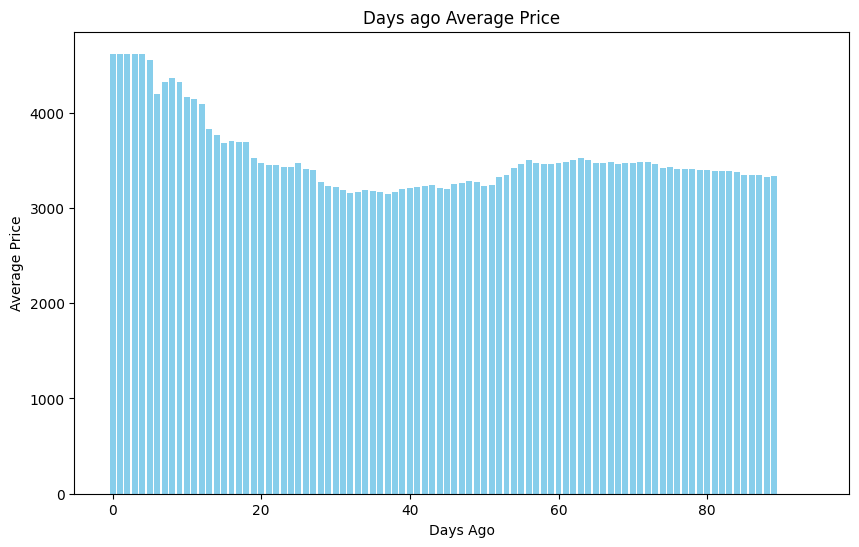

In [56]:
plot_days_ago_data(calc_avg_on_days_ago(non_diwali_data))

In [57]:
diwali_std = np.std([int(r[4]) for r in diwali_data]) 
non_diwali_std = np.std([int(r[4]) for r in non_diwali_data]) 
print("Diwali Std deviation = ", diwali_std)
print("Non Diwali Std deviation = ", non_diwali_std)

Diwali Std deviation =  1927.0192319842179
Non Diwali Std deviation =  373.80962984531544


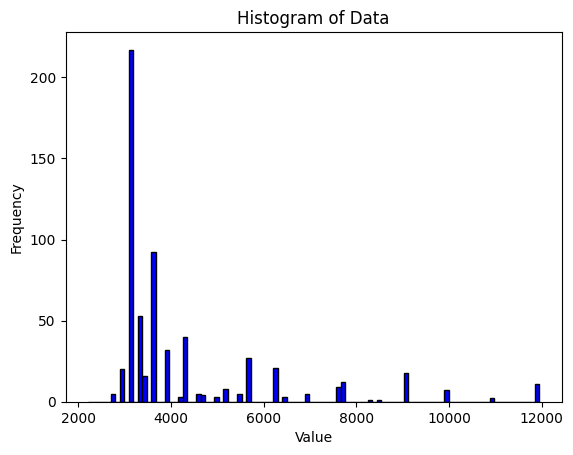

In [67]:
# Create a histogram
diwali_prices = [int(r[4]) for r in diwali_data]
non_diwali_prices = [int(r[4]) for r in non_diwali_data]
combined_min = min(min(diwali_prices), min(non_diwali_prices))
combined_max = max(max(diwali_prices), max(non_diwali_prices))

# Create 10 equally spaced bins from combined_min to combined_max
bins = np.linspace(combined_min, combined_max, 101)  # 11 edges give 10 bins
plt.hist([int(r[4]) for r in diwali_data], bins=bins, color='blue', edgecolor='black')

# Label the axes
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

# Display the plot
plt.show()

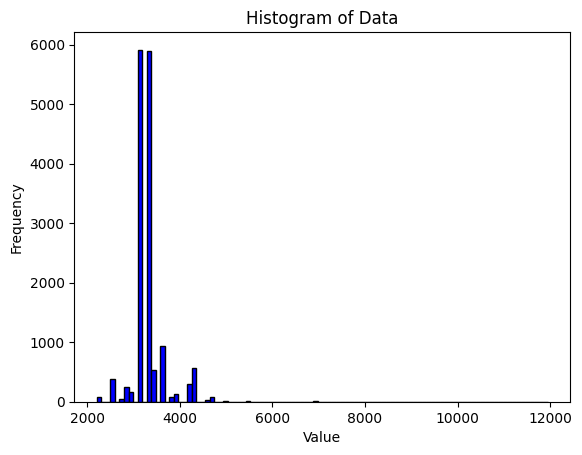

In [68]:
# Create a histogram
plt.hist([int(r[4]) for r in non_diwali_data], bins=bins, color='blue', edgecolor='black')

# Label the axes
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

# Display the plot
plt.show()

In [70]:
from dtw import dtw
def apply_dtw(list1, list2):
# Convert lists to numpy arrays
    list1 = np.array(list1).reshape(-1, 1)
    list2 = np.array(list2).reshape(-1, 1)

    # Compute DTW distance
    d, cost_matrix, acc_cost_matrix, path = dtw(list1, list2, dist=lambda x, y: abs(x - y))

    # Access the DTW distance and path
    # distance = alignment.distance
    # path = alignment.index1, alignment.index2
    plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
    plt.plot(path[0], path[1], 'w')
    plt.show()

Points Processed:  592
Points Processed:  3073


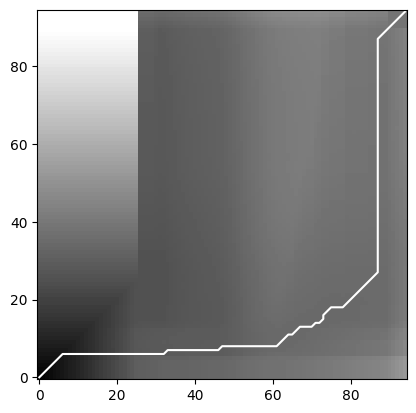

In [ ]:
# a1 = calc_avg_on_days_ago(diwali_data)
# a2 = calc_avg_on_days_ago(non_diwali_data)
a1 = []
a2 = []
for r in non_diwali_data:
    if 

apply_dtw(a1, a2)
# a1